In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras import backend as K 
from keras.layers import BatchNormalization, Dense, Input, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

path = os.getcwd().replace("\\","/") + "/heart.csv"
data = pd.read_csv(path)

# Heart Attack Prediction Dataset <br>
<a href="https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset"> Dataset comes from kaggle </a>

### The dataset has 14 columns:
0.  age - Age of the person
1.  sex - Gender of the person
2.  cp - Chest Pain type chest pain type
3.  trtbps - resting blood pressure in mm/Hg
4.  chol - cholestoral in mg/dl
5.  fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
6.  restecg - resting electrocardiographic results
7.  thalachh - maximum heart rate achieved
8.  exng - exercise induced angina (1 = yes; 0 = no)
9.  oldpeak - Previous peak
10.  slp - Slope
11.  caa - number of major vessels (0-3)
12.  thall - Thal rate
13.  output - Target variable

## The dataframe

In [2]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Information about the datatype of the features (no null values)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Statistics about the data

In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Number of target variables 

In [5]:
data.groupby("output").output.count().reset_index(name="nº of heart attacks").rename(index={0:"no heart attack",1:"heart attack"})

,output,nº of heart attacks
no heart attack,0,138
heart attack,1,165


## Separating the dataframe
*  X will have the features and the values <br>
*  y will have the target values that we want to predict <br>

In [6]:
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
target = 'output'
X = data[features].values
y = data[target].values

## Normalization of the features values
some columns like trtbps, chol and thalachh have large values. The NN model will benefit from the values normalization of the values

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Separating the training and testing data

opted for a 0.7/0.3 particion on this dataset wich means that 212 entrys will be for the training of the model and 91 for testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

## The model

the model used is composed of ...

In [9]:
def get_model(number_of_features, number_of_outputs):
    inputs = Input(shape=(number_of_features,))
    l = Dense(7, activation='relu')(inputs)
    l = Dense(4, activation='relu')(l)
    outputs = Dense(number_of_outputs, activation='sigmoid')(l)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = get_model(len(features), 1)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=3, callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
71/71 [==============================] - 13s 6ms/step - loss: 0.6716 - accuracy: 0.6322 - val_loss: 0.6851 - val_accuracy: 0.5714
Epoch 2/50
71/71 [==============================] - 0s 1ms/step - loss: 0.7129 - accuracy: 0.5637 - val_loss: 0.6359 - val_accuracy: 0.6593
Epoch 3/50
71/71 [==============================] - 0s 1ms/step - loss: 0.6394 - accuracy: 0.5944 - val_loss: 0.5987 - val_accuracy: 0.7143
Epoch 4/50
71/71 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.6862 - val_loss: 0.5642 - val_accuracy: 0.7253
Epoch 5/50
71/71 [==============================] - 0s 1ms/step - loss: 0.5672 - accuracy: 0.7778 - val_loss: 0.5304 - val_accuracy: 0.7692
Epoch 6/50
71/71 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.8111 - val_loss: 0.5017 - val_accuracy: 0.7802
Epoch 7/50
71/71 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7930 - val_loss: 0.4794 - val_accuracy: 0.8022
Epoch 8/50
71/71 [=

## Accuracy and loss

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("the test loss was {0:.2f} with an accuracy of {1:.1f}%".format(test_loss, test_acc * 100))

the test loss was 0.38 with an accuracy of 83.5%


### graphs of accuracy and loss

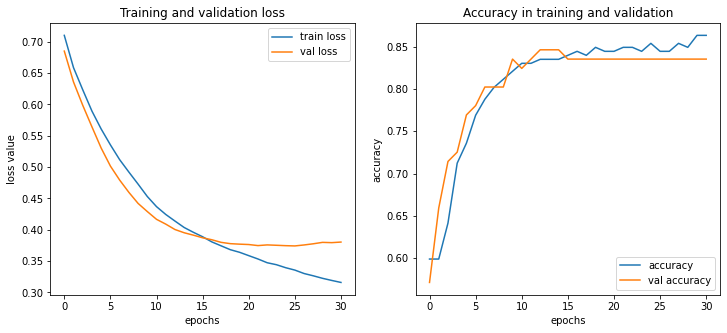

In [11]:
history_df = pd.DataFrame(history.history)
plt.figure(0,figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history_df.loss,label="train loss")
plt.plot(history_df.val_loss,label="val loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.legend(loc="best")
plt.subplot(1, 2, 2)
plt.plot(history_df.accuracy,label="accuracy")
plt.plot(history_df.val_accuracy,label="val accuracy")
plt.title("Accuracy in training and validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.show()